### Station Ispra: Investigating high values of absorption data in 2014 

In [1]:
import pyaerocom as pya

DATA_DIR = pya.const.EBASMC_DATA_DIR + '/'

Init data paths for lustre


0.016876935958862305 s


In [2]:
print('Last EBAS database update: {}'.format(open(DATA_DIR + '../Revision.txt').readline()))

Last EBAS database update: 20190115



#### Get all files that contain scattering absorption data

In [3]:
reader = pya.io.ReadEbas()

In [4]:
data = reader.read(vars_to_retrieve=['absc550aer'], station_names='Ispra', start_date='2014-01-01',
                   stop_date='2014-12-31')
data

Reading file 1 of 3 (ReadEbas)
Reading file 2 of 3 (ReadEbas)
Reading file 3 of 3 (ReadEbas)


UngriddedData <networks: ['EBASMC']; vars: ['absc550aer']; instruments: ['MageeAE31B', 'MageeAE31A'];No. of stations: 2

In [5]:
stats = data.to_station_data_all()

In [6]:
def plot_stat(num=0, low=-1, high=100):
    from copy import deepcopy
    data = stats[num].absc550aer
    ax = data.plot(figsize=(16,6), label='All')
    subset = deepcopy(data)
    notok = ~((data > low) & (data < high))
    subset[notok] = np.nan
    subset.plot(label='Outliers removed', ax=ax)
    ax.set_title('{} ({})'.format(stats[num].station_name, stats[num].ts_type))
    ax.set_ylabel('absc550aer [1/Mm]')
    ax.legend()
    ax.set_ylim([np.nanmin(data)-1, np.nanmax(data)+1])

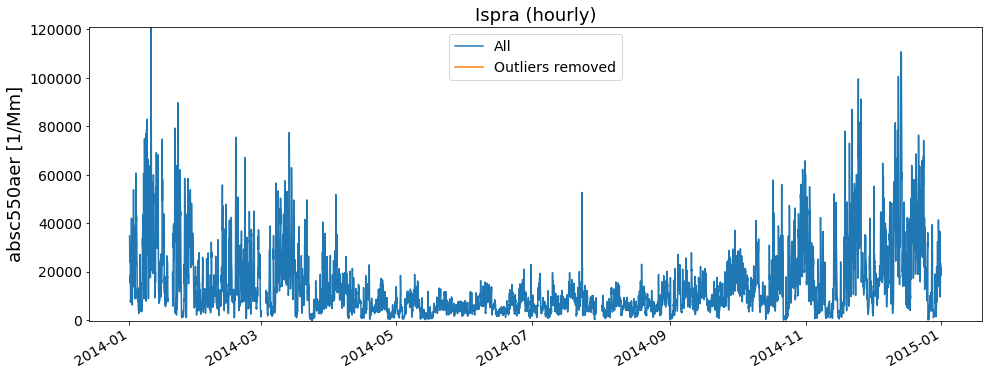

In [7]:
plot_stat(0)

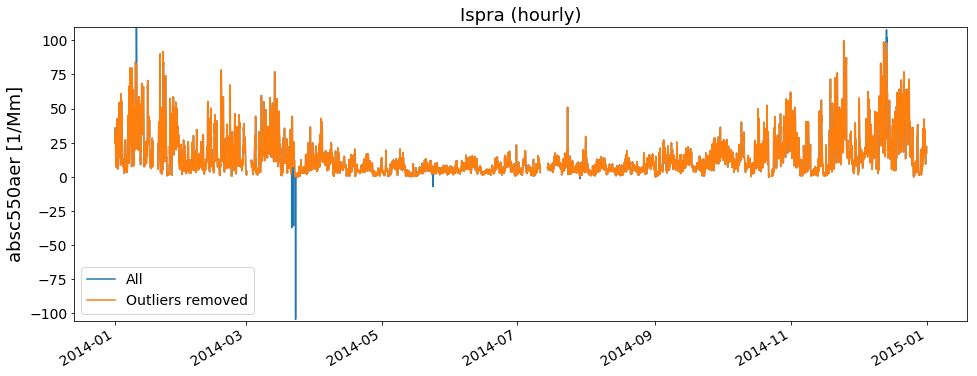

In [8]:
plot_stat(1)